### INF 510 Fall 2019 Final Project Submission

Q1. The names of team member(s)

   Shouejie Chai

Q2. How to run your code (what command-line switches they are, what happens when you invoke the code, etc.)

   This project requires the following packages:
   sqlite3, pandas, pygal, pygal_maps_world, IPython.display, collections
   I like the pygal package which has a bunch of interactive visualization. I am also a fan of plotly which could make both powerful dash and interactive visualziation. Because of the time limitation this semester, I will play around that one for the future project.

   To run this project, make sure the above packages are installed, and then simply clone the repo at https://github.com/ShoujieChai/inf510_project and execute this notebook

Q3. Any major “gotchas” to the code (i.e. things that don’t work, go slowly, could be improved, etc.)
   
   The database may not use the standard brand_name which could cause the problem for data matching. 

Q4. Anything else you feel is relevant to the grading of your project your project.

   For the "pygal_maps_world" package, you need to install it first (pip install pygal_maps_world). If you are a Windows user, you may still have the problem of world map plotting (step6). It may be fine for Mac user. I screenshot the graph for step6 (also in the data folder) in case you can not generate it. 

Q5. What did you set out to study?  (i.e. what was the point of your project?  This should be close to your Milestone 1 assignment, but if you switched gears or changed things, note it here.)
   
   Something I changed: I move all three tables "drugs", "adverse_effects", "fda_new_drugs" into the same database "prostate_cancer_drugs.db"
  
   Two key points:
   1. What are the top 5 adverse effects for each prostate cancer drug? What are the top 5 countries with the most adverse effect events for each prostate cancer drug? What percentage does each drug contribute to the total adverse effects of prostate cancer drugs in US?
   2. How many new drugs approved by FDA in past 17 years? What is the number of new drugs approved in each year? What is the number of new drugs approved for each treatment?

Q6. What did you Discover/what were your conclusions (i.e. what were your findings?  Were your original assumptions confirmed, etc.?)

  A. The top 5 adverse effects and countries with most adverse effect events for each prostate cancer drug are listed 
 
  B. The Xtandi has the most adverse effect events (14742 events reported) in US compared with other drugs. Also I plot the top 5 countries with most advers effect event in the worls map (I love this package! Super awersome).
  
  C. There are total 1211 drugs approved by FDA from 2002 to 2019. Among them, 2018 has 112 drugs approved, the highest number. The Allergen company has the highest number of drugs approved (35). As for treatment, diabetes has 51 drugs approved in past 17 years, ranking the first position.

Q7. What difficulties did you have in completing the project?  

   One chanllege is the extrating and reorganizing the important data into the format what you want. The other one is how to make pretty ploting or visualization.

Q8. What skills did you wish you had while you were doing the project?

   The skill I want is to find a fasicinating database with cool ideas to work on a amazing project. Also I wish I am familiar with plotly packages that I could build up a big FDA data dash. 

Q9. What would you do “next” to expand or augment the project?

Build up my dash for the project!

In [21]:
! pip install pygal
! pip install pygal_maps_world

In [4]:
import sqlite3
import pandas as pd
import pygal
from pygal_maps_world.maps import World
from IPython.display import SVG, display
from collections import Counter

Connect the sql database 'prostate_cancer_drug.db' 

In [22]:
conn = sqlite3.connect('./data/prostate_cancer_drugs.db')
cur = conn.cursor()

Additonal step: Adding the correct brand_name into the "real_brand_name" column of table "drugs"

cur.execute("ALTER TABLE drugs ADD COLUMN real_brand_name TEXT")
modified_name = ['Zytiga', 'Erleada', 'Casodex', 'Jevtana', 'Taxotere', 'Firmagon', 'Taxotere','Lupron Depot',
       'Xtandi', 'Eulexin', 'Zoladex', 'Novantrone', 'Nilandron', 'Provenge', 'Xofigo']
idx = 1
for name in modified_name:
    cur.execute(f'UPDATE drugs SET real_brand_name = "{name}" WHERE ROWID={idx}')
    idx += 1    

conn.commit() 

Step1: query all information from the table 'drugs' and read the dataframe through pandas

In [23]:
query = 'select * from drugs'
dr_sql_df = pd.read_sql(query, conn)
dr_sql_df.head()

,generic_name,brand_name,implication,real_brand_name
0,Abiraterone Acetate,Zytiga,Prostate cancer that has metastasized (spread ...,Zytiga
1,Apalutamide,Erleada,Prostate cancer. It is used:In patients whose ...,Erleada
2,Bicalutamide,Casodex,Prostate cancer that has metastasized (spread ...,Casodex
3,Cabazitaxel,Jevtana,Prostate cancer that has metastasized (spread ...,Jevtana
4,Darolutamide,Nubeqa,Prostate cancer that has not metastasized (spr...,Taxotere


Step2: query all information from the table 'adverse_effects' and read the dataframe through pandas

In [7]:
query = 'select * from adverse_effects'
ae_sql_df = pd.read_sql(query, conn)
ae_sql_df.head()

,brand_name,rxn1,rct1,rxn2,rct2,rxn3,rct3,rxn4,rct4,rxn5,...,cntry1,cct1,cntry2,cct2,cntry3,cct3,cntry4,cct4,cntry5,cct5
0,Zytiga,DEATH,1140,FATIGUE,423,PROSTATIC SPECIFIC ANTIGEN INCREASED,404,PROSTATE CANCER,384,DRUG INEFFECTIVE,...,us,3006,jp,932,fr,534,de,316,gb,254
1,Erleada,DEATH,17,FATIGUE,17,RASH,12,FALL,11,DISEASE PROGRESSION,...,us,124,jp,10,fr,9,ca,8,it,4
2,Casodex,DEATH,411,FATIGUE,358,PROSTATIC SPECIFIC ANTIGEN INCREASED,356,MALIGNANT NEOPLASM PROGRESSION,350,PROSTATE CANCER,...,us,1007,jp,734,ca,328,nl,285,fr,200
3,Jevtana,FEBRILE NEUTROPENIA,116,NEUTROPENIA,96,DIARRHOEA,85,PYREXIA,80,DEATH,...,jp,278,us,160,fr,123,de,85,it,55
4,Taxotere,FEBRILE NEUTROPENIA,228,FATIGUE,203,OSTEONECROSIS OF JAW,199,NEUTROPENIA,191,DIARRHOEA,...,us,552,jp,408,gb,178,fr,155,de,102


Step3: Plot the event number of top 5 adverse effects in 10 prostate cancer drugs

In [8]:
drugs = list(ae_sql_df['brand_name'].values[:]) # get the drug list
rct1 = list(ae_sql_df['rct1'].values[:]) # get the top1 adverse effect for each drug
rct2 = list(ae_sql_df['rct2'].values[:])
rct3 = list(ae_sql_df['rct3'].values[:])
rct4 = list(ae_sql_df['rct4'].values[:])
rct5 = list(ae_sql_df['rct5'].values[:])

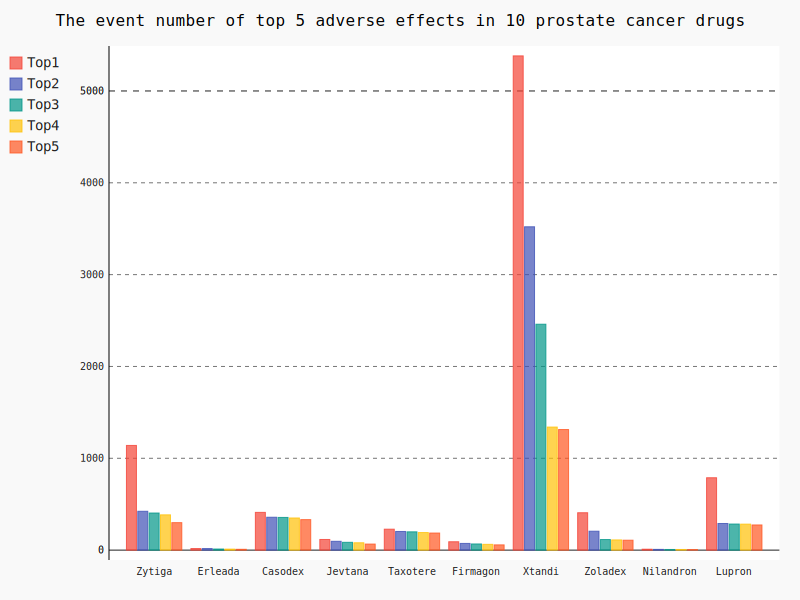

In [9]:
bar_chart = pygal.Bar()  #pygal package for bar plot
bar_chart.title = 'The event number of top 5 adverse effects in 10 prostate cancer drugs'
bar_chart.x_labels = drugs
bar_chart.add('Top1',rct1)
bar_chart.add('Top2',rct2)
bar_chart.add('Top3',rct3)
bar_chart.add('Top4',rct4)
bar_chart.add('Top5',rct5)
#bar_chart.render_in_browser() #visualize the interactive plots in the browser 
display(SVG(bar_chart.render(disable_xml_declaration=True))) #visualize in SVG

Step4: Plot the death event in 10 prostate cancer drugs (Death is the severest adverse effect for drugs, so it is important to enumerate)

In [10]:
drugs = list(ae_sql_df['brand_name'].values[:]) # get the drug list
rxns = ['rxn1','rxn2','rxn3','rxn4','rxn5']
rcts = ['rct1','rct2','rct3','rct4','rct5']
for drug in range(0,10):     # count the death in each drug through for loop
    for i in range(0,5):
        if  ae_sql_df.loc[drug, rxns[i]] == 'DEATH':
            ae_sql_df.loc[drug, 'death'] = ae_sql_df.loc[drug, rcts[i]]
        else:
            pass

deaths = list(ae_sql_df['death'].values[:])

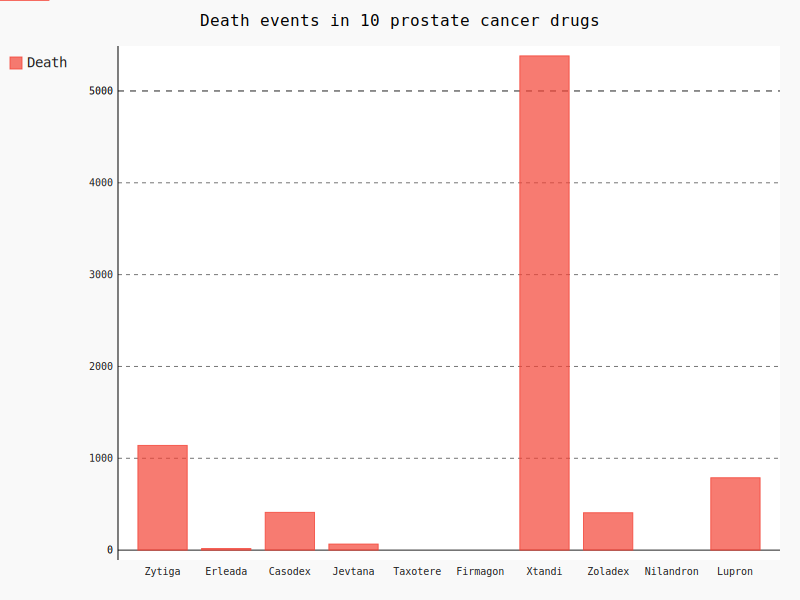

In [11]:
bar_chart = pygal.Bar()
bar_chart.title = 'Death events in 10 prostate cancer drugs'
bar_chart.x_labels = drugs
bar_chart.add('Death', deaths)
#bar_chart.render_in_browser()
display(SVG(bar_chart.render(disable_xml_declaration=True)))

Step5: Plot the total event number of 10 drugs in US

In [12]:
drugs = list(ae_sql_df['brand_name'].values[:]) # get the drug list
cntrys = ['cntry1','cntry2','cntry3','cntry4','cntry5']
ccts = ['cct1','cct2','cct3','cct4','cct5']
for drug in range(0,10):  # count the events of each drug in US
    for i in range(0,5) :
        if ae_sql_df.loc[drug, cntrys[i]] == 'us':
            ae_sql_df.loc[drug, "us"] = ae_sql_df.loc[drug, ccts[i]]
        else:
            pass
us_events = list(ae_sql_df["us"].values[:])
us_sum = sum(us_events[0:7]+us_events[8:10]) # sum up the total events
us_percentages = [us_events[i]/us_sum for i in range(0,10) if pd.isnull(us_events[i]) == False   ] # calculate the percentage of each drug

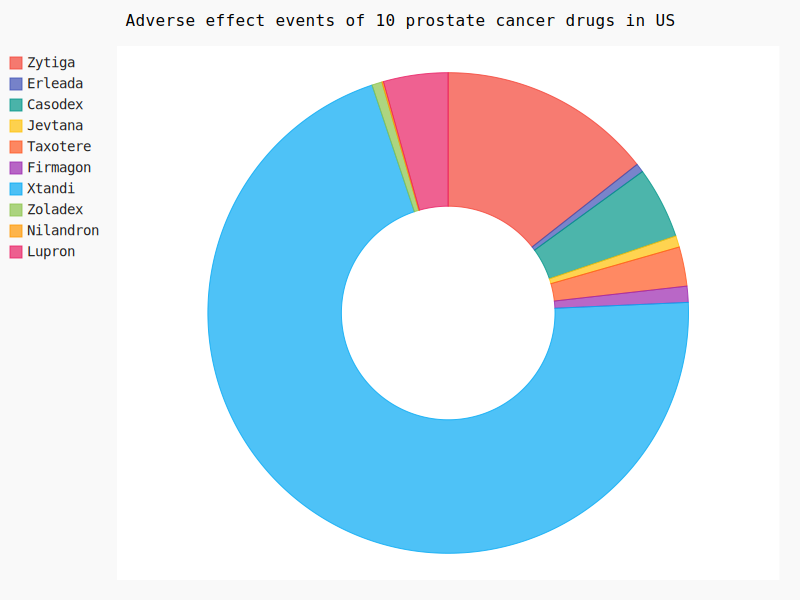

In [13]:
pie_chart = pygal.Pie(inner_radius=.4) # Pie plot in pygal packages
pie_chart.title = 'Adverse effect events of 10 prostate cancer drugs in US'
for i in range(0,10): 
    pie_chart.add(drugs[i],us_percentages[i])
#pie_chart.render_in_browser()
display(SVG(pie_chart.render(disable_xml_declaration=True)))

Step6: Since the drug Xtandi(Enzalutamide) has the highest number of adverse effects, I will plot its event numbers of top5 countries in the map.

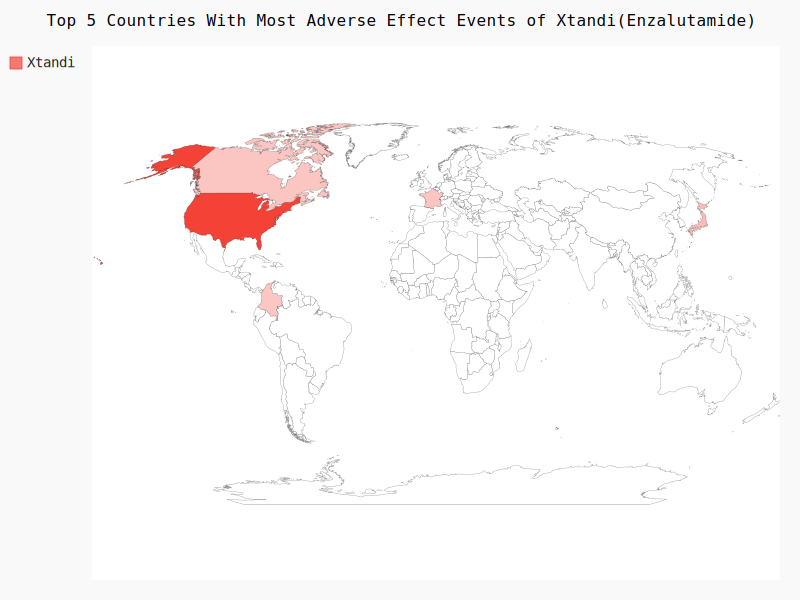

In [14]:
worldmap_chart = World() # World map plot in pygal package
worldmap_chart.title = 'Top 5 Countries With Most Adverse Effect Events of Xtandi(Enzalutamide) '
worldmap_chart.add('Xtandi', {
  'co': 246,
  'ca': 289,
  'fr': 406,
  'jp': 1350,
  'us': 14742
})
#worldmap_chart.render_in_browser()
display(SVG(worldmap_chart.render(disable_xml_declaration=True)))

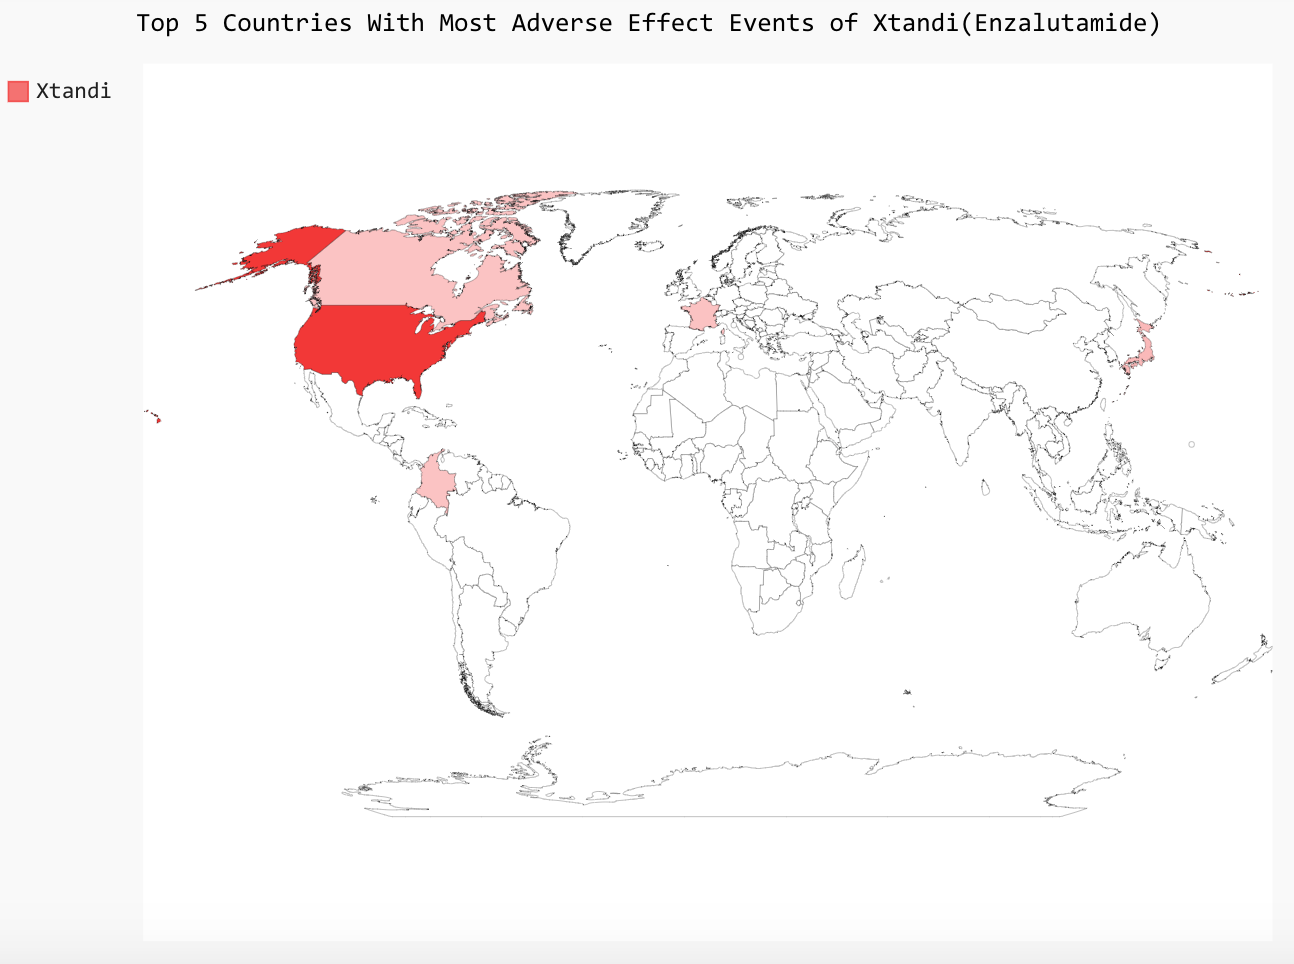

Step7: query the information of 1211 FDA approved drugs from 2002 to 2019

In [94]:
query = 'select * from fda_new_drugs'
fda_sql_df = pd.read_sql(query, conn)
print(len(fda_sql_df)) # print the total number of new approved drugs in past 17 years
fda_sql_df.head()

1211


,brand_name,generic_name,dosage_form,approved_year,approved_month,approved_date,company,treatment
0,Faslodex,fulvestrant,Injection,2002,April,25,AstraZeneca,Breast Cancer
1,Lexapro,escitalopram,TabletsandOralSolution,2002,August,14,"Allergan, Inc.","Depression, Generalized Anxiety Disorder"
2,Pegasys,peginterferon,Injection,2002,October,16,Hoffmann-La Roche,Chronic Hepatitis C
3,Humira,adalimumab,Injection,2002,December,31,"Abbvie, Inc.","Rheumatoid Arthritis, Psoriatic Arthritis, Cr..."
4,Amevive,alefacept,,2003,January,30,"Biogen, Inc",Psoriasis


#Step8: plot the number of FDA approved drugs by year

In [88]:
years = range(2002,2020)
numbers = []   
for year in years:  # count the number of drugs by year
    numbers.append(len(fda_sql_df.loc[fda_sql_df["approved_year"]==year]))

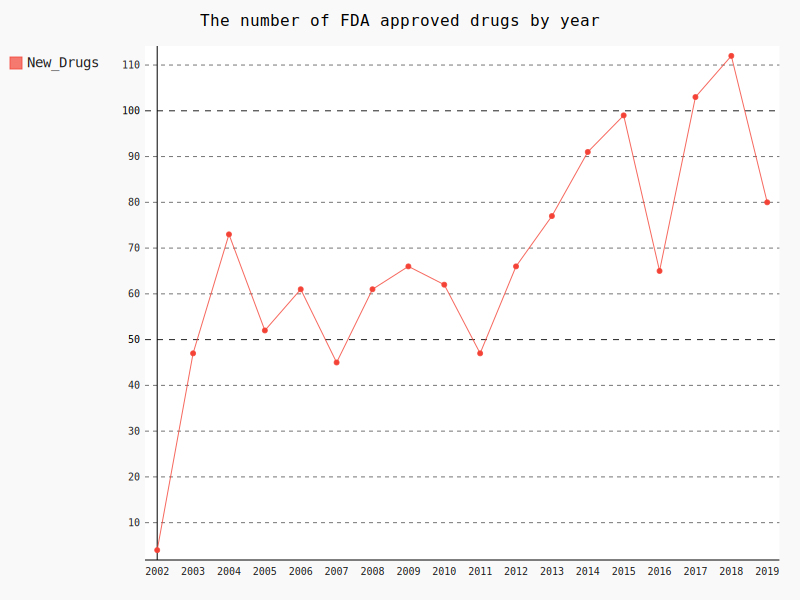

In [89]:
line_chart = pygal.Line()  # line plot in pygal package
line_chart.title = 'The number of FDA approved drugs by year'
line_chart.x_labels = years
line_chart.add('New_Drugs', numbers)
line_chart.render()
#line_chart.render_in_browser()
display(SVG(line_chart.render(disable_xml_declaration=True)))

Step9: plot the FDA approved drugs by company

In [16]:
companys = list(fda_sql_df["company"].unique()) # get the unique company list
numbers = {}
for company in companys:  # create a dictionary for storing the drug number by company
    numbers[company]=(len(fda_sql_df.loc[fda_sql_df["company"]==company]))
numbers_sort = {k: v for k, v in sorted(numbers.items(), key=lambda item: item[1],reverse=True)} # sort the company by the drug number from largest to smallest
top_company = list(numbers_sort.keys())[0:10]  # get the top 10 companies
top_number = list(numbers_sort.values())[0:10]

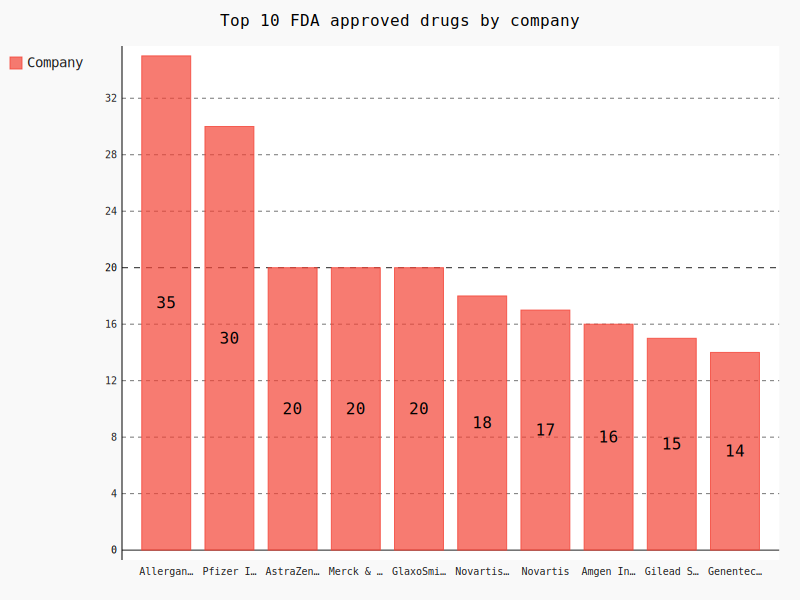

In [50]:
bar_chart = pygal.Bar(print_values = True)
bar_chart.title = 'Top 10 FDA approved drugs by company'
bar_chart.x_labels = top_company
bar_chart.add('Company', top_number)
bar_chart.render()
#bar_chart.render_in_browser()
display(SVG(bar_chart.render(disable_xml_declaration=True)))

Step10: plot the FDA approved drugs for treatments

In [18]:
treatments = list(fda_sql_df["treatment"])
# since some drugs have been approved for multi-treatments, the drug numbers for different treatments would be recounted
split_treatments = []
for treatment in treatments:   # if the drug has multiple treatments, split it by "," 
    if ("," in treatment) == True:
        split_treatments += treatment.split(",")
    else:
        split_treatments.append(treatment)     
tr_numbers = dict(Counter(split_treatments))  # use the Counter function to count the elements in the list, return into a dictionary
tr_numbers_sort = {k: v for k, v in sorted(tr_numbers.items(), key=lambda item: item[1],reverse=True)}  # sort the treatment by the number of drugs
top_treatment = list(tr_numbers_sort.keys())[0:10]  # get the top 10 treatments
top_tr_number = list(tr_numbers_sort.values())[0:10]

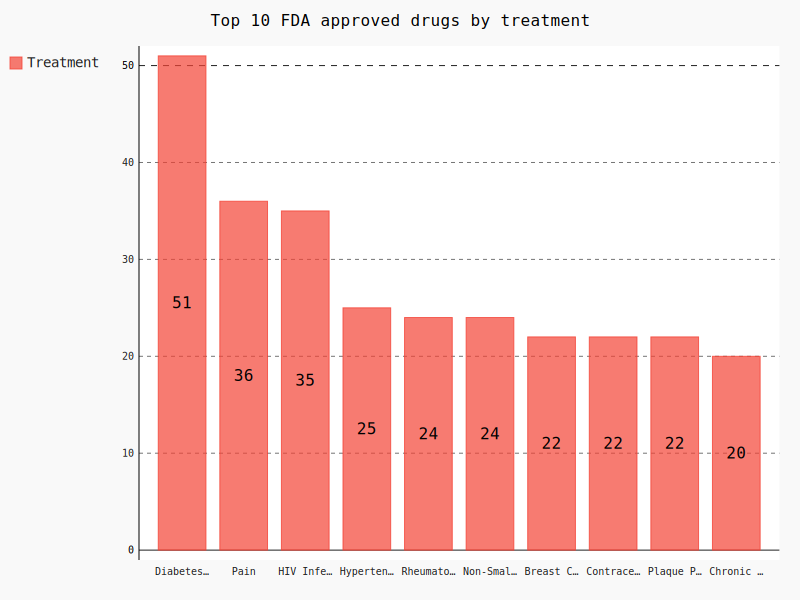

In [49]:
bar_chart = pygal.Bar(print_values = True)
bar_chart.title = 'Top 10 FDA approved drugs by treatment'
bar_chart.x_labels = top_treatment
bar_chart.add('Treatment', top_tr_number,reverse=False)
bar_chart.render()
#bar_chart.render_in_browser()
display(SVG(bar_chart.render(disable_xml_declaration=True)))

Step11: query the information from both tables in the database

In [32]:
# To get the approved year for the prostate cancer drug, we request data from two table joined by brand_name
query = 'select fda_new_drugs.approved_year, adverse_effects.* from adverse_effects join fda_new_drugs on adverse_effects.brand_name=fda_new_drugs.brand_name'
mix_sql_df = pd.read_sql(query, conn)
mix_sql_df

,approved_year,brand_name,rxn1,rct1,rxn2,rct2,rxn3,rct3,rxn4,rct4,...,cntry1,cct1,cntry2,cct2,cntry3,cct3,cntry4,cct4,cntry5,cct5
0,2011,Zytiga,DEATH,1140,FATIGUE,423,PROSTATIC SPECIFIC ANTIGEN INCREASED,404,PROSTATE CANCER,384,...,us,3006,jp,932,fr,534,de,316,gb,254
1,2018,Erleada,DEATH,17,FATIGUE,17,RASH,12,FALL,11,...,us,124,jp,10,fr,9,ca,8,it,4
2,2010,Jevtana,FEBRILE NEUTROPENIA,116,NEUTROPENIA,96,DIARRHOEA,85,PYREXIA,80,...,jp,278,us,160,fr,123,de,85,it,55
3,2008,Firmagon,FATIGUE,91,ASTHENIA,73,INJECTION SITE PAIN,67,NAUSEA,63,...,us,226,fr,98,jp,55,nl,51,ca,42
4,2012,Xtandi,DEATH,5382,MALIGNANT NEOPLASM PROGRESSION,3521,FATIGUE,2460,ASTHENIA,1340,...,us,14742,jp,1350,fr,406,ca,289,co,246


Step12: Caculate the event per year in US

In [35]:
drugs = list(mix_sql_df['brand_name'].values[:])
cntrys = ['cntry1','cntry2','cntry3','cntry4','cntry5']
ccts = ['cct1','cct2','cct3','cct4','cct5']
for drug in range(0,5):
    for i in range(0,5) :
        if mix_sql_df.loc[drug, cntrys[i]] == 'us':
            mix_sql_df.loc[drug, 'us'] = mix_sql_df.loc[drug, ccts[i]]/(2019 - mix_sql_df.loc[drug,'approved_year']+1) # calculate the events per year
        else:
            pass

per_year_event_us = list(mix_sql_df['us'].values[:])

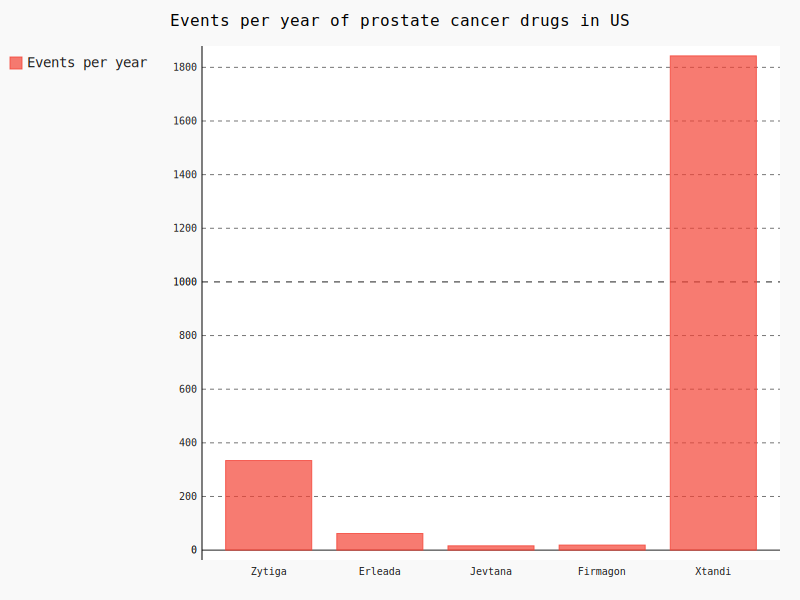

In [36]:
bar_chart = pygal.Bar()
bar_chart.title = 'Events per year of prostate cancer drugs in US'
bar_chart.x_labels = drugs
bar_chart.add('Events per year',per_year_event_us)
#bar_chart.render_in_browser()
display(SVG(bar_chart.render(disable_xml_declaration=True)))